# Physics Final Project

#### By Aadya Agrawal and Joshua Strauss

This code was inspired by a code found on the internet and then rewritten based on our understanding. 

First, we imported matplotlib and numpy as well as a function 'odient' that allows us to solve the complicated differential equations used in the Hodgkin-Huxley model. 

In [173]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import odeint


Then we define the different constants and parameters that are needed to solve the differential equations:the time period for how long we want the program to run, the individual average conductances, membrane capacitance, and potentials of the different components. 
In our project, we vary the values of gK, gNa, gL and Cm (the channel conductances and membrane capacitance) to study the impact it has on the length of the refractory period in the neuron while everything else is held constant. 
The array for the time period is also defined. 

In [174]:

# Start and end time (in milliseconds)
tmin = 0.0
tmax = 60.0

# Average potassium channel conductance per unit area (mS/cm^2)
gK = 500.0

# Average sodoum channel conductance per unit area (mS/cm^2)
gNa = 120.0

# Average leak channel conductance per unit area (mS/cm^2)
gL = 0.3

# Membrane capacitance per unit area (uF/cm^2)
Cm = 1.0

# Potassium potential (mV)
VK = -90.0

# Sodium potential (mV)
VNa = 115.0

# Leak potential (mV)
Vl = -70

# Time values
T = np.linspace(tmin, tmax, 10000)


Then we define the rate functions of the two channels as well as the steady state values of n, m, h using the equations determined by Hodgkin-Huxley in terms of the membrane potential (V_mem).

In [175]:
# Potassium ion-channel rate functions

def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp(1.0 - (0.1 * Vm)) - 1.0)

def beta_n(Vm):
    return 0.125 * np.exp(-Vm / 80.0)

# Sodium ion-channel rate functions

def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (np.exp(2.5 - (0.1 * Vm)) - 1.0)

def beta_m(Vm):
    return 4.0 * np.exp(-Vm / 18.0)

def alpha_h(Vm):
    return 0.07 * np.exp(-Vm / 20.0)

def beta_h(Vm):
    return 1.0 / (np.exp(3.0 - (0.1 * Vm)) + 1.0)
  
# n, m, and h steady-state values

def n_steady(Vm):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))

def m_steady(Vm):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))

def h_steady(Vm):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))
  


Next, the input current stimulus is defined to provide two spikes of current of varying strength. This current is used to calculate the result of the differential equations. 

In [176]:
# Input stimulus
def Id(t):
    if 0.0 < t < 1.0:
        return 150.0
    elif 30.0 < t < 31.0:
        return 125.0
    return 0.0

Then , we define a function that computes the derivatives needed to solve the differential equations. The derivatives of n, m and h are calculted using the values of alpha and beta as defined by the mathematical model. 

In [177]:
# Compute derivatives
def compute_derivatives(y, t0):
    dy = np.zeros((4,))
    
    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    
    # dVm/dt
    GK = (gK / Cm) * np.power(n, 4.0)
    GNa = (gNa / Cm) * np.power(m, 3.0) * h
    GL = gL / Cm
    
    dy[0] = (Id(t0) / Cm) - (GK * (Vm - VK)) - (GNa * (Vm - VNa)) - (GL * (Vm - Vl))
    
    # dn/dt
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    
    # dm/dt
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    
    # dh/dt
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)
    
    return dy


Finally, we define an array to record the results of the rate functions and use it in the 'odient' fucntion to solve the equations and record the results in an array as the values vary with time. 

In [178]:
Vm = -70.0  #Defined as a separate variable to allow for easy changes. 

# State (Vm, n, m, h)
Y = np.array([Vm, n_steady(Vm), m_steady(Vm), h_steady(Vm)])

# Solve DE system

Vy = odeint(compute_derivatives, Y, T)

We then plot the neuron potential and measure the refractory period based on the graph. A reference line is used to show that the resting potential of the neuron is -70 mV and allows for the easy calculation of the refractory period. 

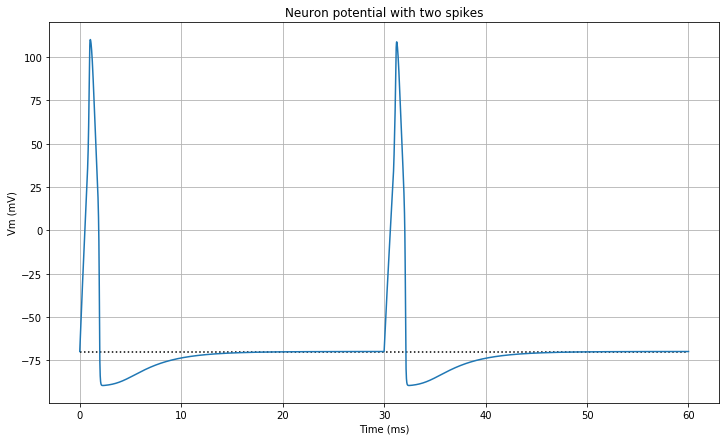

In [179]:

# Neuron potential
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(T, Vy[:, 0])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neuron potential with two spikes')
ax.hlines(-70,0.01,tmax, linestyles='dotted')
plt.grid()


## Results

The tables showing the results are displayed below:

| gK | Refractory period(ms)|
|-----|:--------------------:|
|5 | 9|
|20|11|
|36 |11|
|50| 12|
|70 | 12|
|150| 13|
|500| 13.5|
|1000|14|

As we can see from above increasing the average conductance per unit area of the potassium channel (gK) increases the refractory period but as the values get larger, the relative change becomes smaller, following a logrithmic pattern.

|gNa| Refractory period (ms) |
|----|:----------------------:|
|3|0|
|5|5|
|60|9|
|100|9|
|120|11|
|135|10.5|
|150|10|
|1000|11|

Changing the values of the condutance per unit area of the sodium channel (gna) behaves in a similar fashion to that of gK.

|gL| Refractory Period (ms)|
|---|:---------------------:|
|0| $\inf$|
|0.03|92|
|0.1|32|
|0.2|16.5|
|0.3|11.5|
|0.6|6.9|
|0.9|6.9|

Varying the values of the conductance of the leak channel (gL) shows that as the conductance increases, the refractory period decrease exponentially and seems to approach an aymptote.

|Cm| Refractory Period (ms)|
|---|:---------------------:|
|0 | N/A|
|0.05 | 5.8|
|0.1| 5.8|
|0.5| 8|
|1| 11.5|
|1.3|16|
|1.8 | N/A|

On varying the membrane capacitance (Cm), we note that the model only works for a finite amount of values and increases almost linearly as the capacitance increases.

Further explanation analysis has been included in the attached word document

Division of Labor:
The research for the project was done by both the members. The code was modified and tested by both and then the parameters that were to be tested were divided between the two. Joshua worked on the membrane capacitance and the leak conductance, while Aadya worked on the sodium and potassium channel conductances. The results were analyzed together. Joshua worked on the word document writeup and Aadya worked on the markdown writeup in the Python Notebook. All work was cross-checked by both parties before submission. 